In [16]:
import math
import matplotlib as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from scipy.stats import chisquare, iqr

In [2]:
# Загрузим данные, проверим число наблюдений и столбцов, типы данных, 
# наличие пропущенных значений, какие уникальные значения встречаются.

# Сколько уникальных рекламных кампаний было проведено? 


df=pd.read_csv('C:/Users/mgika/Documents/KK_Data_analyst/statistics/conversion.csv')


df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2


In [3]:
df.shape

(1143, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [5]:
df.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

In [6]:
df.interest.unique()

array([ 15,  16,  20,  28,  29,  27,  31,   7,  30,  24,  21,  32,  18,
        63,  65,  25,  10,  19,  26,  36,  23,  64,  22,   2,  66, 100,
       101, 102, 103, 105, 107, 110, 111, 112, 113, 108, 109, 114, 104,
       106], dtype=int64)

In [7]:
df.xyz_campaign_id.unique()

array([ 916,  936, 1178], dtype=int64)

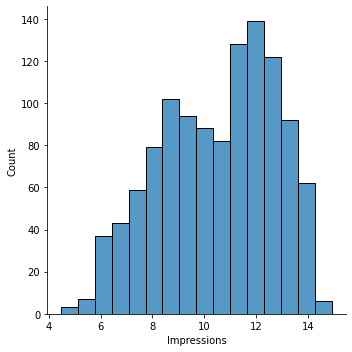

In [8]:
# Построим график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) 
# для каждой рекламной кампании в Facebook, прологарифмировав значения


sns.displot(np.log(df.Impressions))

In [9]:
# Посчитаем CTR (click-through rate), которая показывает кликабельность, т.е. отношение числа кликов к количеству показов.

# CTR=impressions/clicks


df['CTR%']=df.Clicks/df.Impressions*100
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR%
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.011198
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.023480
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.024195


In [12]:
# Найдём ad_id объявления с наибольшим CTR.

df.loc[df['CTR%'].idxmax()]

ad_id                    738637
xyz_campaign_id             936
fb_campaign_id           109857
age                       45-49
gender                        F
interest                     24
Impressions                 944
Clicks                        1
Spent                      1.42
Total_Conversion              1
Approved_Conversion           0
CTR%                   0.105932
Name: 150, dtype: object

C:\Users\mgika\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CTR%', ylabel='Density'>

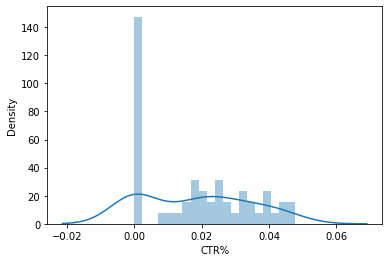

In [14]:
# Визуализируем CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id).

df_campaign=df.query('xyz_campaign_id == 916')
##df_campaign
sns.distplot(df_campaign['CTR%'], bins=20)

In [15]:
# CPC (cost-per-click) – стоимость за клик пользователя по объявлению.

df['CPC']=df.Spent/df.Clicks
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR%,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.011198,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.023480,1.25
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.024195,1.29


In [17]:
# описательные статистики для CPC


df.CPC.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

In [18]:
# межквартильный размах CPC

iqr(df.CPC, nan_policy='omit')

0.2543636990499998

C:\Users\mgika\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mgika\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CPC', ylabel='Density'>

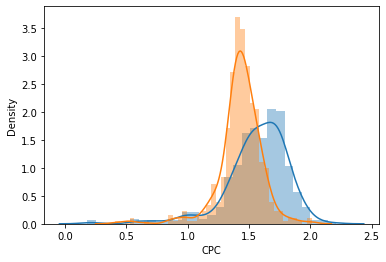

In [19]:
# Визуализируем CPC с разбивкой по полу пользователей, которым были показаны объявления

df_w=df.query('gender=="F"')
df_m=df.query('gender=="M"')


sns.distplot(df_m.CPC.dropna())
sns.distplot(df_w.CPC.dropna())

In [20]:
# Конверсия (conversion rate) – отношение числа пользователей, совершивших целевое действие на определенном этапе,
# к общему числу тех, кто дошел до данного этапа.

# Посчитаем конверсию из клика в покупку

df['conversion'] = (df.Approved_Conversion*100/df.Clicks).round(2)
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR%,CPC,conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605,1.43,100.0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.011198,0.91,0.0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.023480,1.25,0.0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.024195,1.29,100.0
